<a href="https://colab.research.google.com/github/Devphadatare/CBTCIP/blob/main/Iris__flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flower Classification


Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Load the Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Print Statements

In [3]:
# Print the first 5 rows of the dataset for a quick look
print("Feature Names:", iris.feature_names[:2])
print("First 5 rows of the dataset:")
print(pd.DataFrame(X, columns=iris.feature_names[:2]).head())
print("Target Names:", iris.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)']
First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Target Names: ['setosa' 'versicolor' 'virginica']


Splitting the Dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the Model based on dataset

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Predicting the Result

In [7]:
y_pred = knn.predict(X_test)

In [8]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 2 2 0 0 0 0 2 1 1 1 2 0 1 0 2 2 1 2 2 0 0]


Evaluating the Model

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\n Accuracy Score:")
accuracy_score(y_test, y_pred)

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30


 Accuracy Score:


0.8333333333333334

Visualizing the Results

<ipython-input-10-ef8272dcf048>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


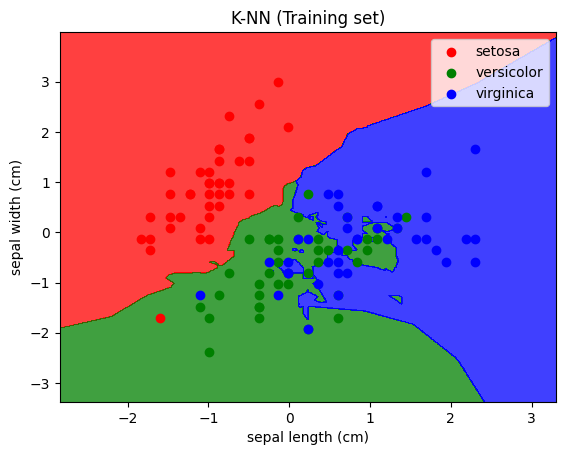

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=iris.target_names[j])
plt.title('K-NN (Training set)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()
